# Задача 3 "Кластеризация физической активности"

В современном мире существуют множество различных устройств (фитнес-браслетов, камер, датчиков и т.д.), которые собирают данные об активности пользователя. Эти сведения могут быть использованы, например, для отслеживания состояния здоровья человека и определение находится ли он сейчас в безопасности, что он делает и так далее.

Данные, собранные с носимых устройств, которые отслеживают физическую активность пользователей, используются во множестве коммерческих приложений, включая здравоохранение, фитнес-тренировки, навигационную систему и так далее.

В данной задаче вам предлагается, используя информацию, собранную с помощью трех Инерциальных измерительных модуля (IMU) и пульсометра.

**Датасет содержит по 54 столбца на строку, столбцы содержат следующие данные:**
- 1 временная метка (с)
- 2 частота сердечных сокращений (уд/мин)
- 3-19 данные с датчиков на руке
- 20-36 данные с датчиков на груди
- 37-53 данные с датчиков на лодыжке

**Сенсорные данные IMU содержат следующие столбцы:**
- 1 температура (°C)
- 2-4 Данные 3D-ускорения (мс-2), масштаб: ±16g, разрешение: 13 бит
- 5-7 Данные 3D-ускорения (мс-2), масштаб: ±6g, разрешение: 13 бит*
- 8-10 данных 3D-гироскопа (рад/с)
- 11-13 Данные 3D-магнитометра (мкТл)

In [1]:
# иморитирование всех необходимых библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("files//Physical_Activity_Monitoring_unlabeled.csv")

df.head()

,timestamp,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,252.75,34.8750,0.902847,7.45872,6.032490,1.006100,7.44575,6.303650,-0.021952,0.004114,...,-0.025606,0.030239,-14.5447,27.3336,-5.76620,0.206416,0.348212,0.763201,-0.503652,5
1,3652.45,29.7500,-4.069330,3.76168,8.279720,-5.972500,3.22273,6.908970,0.116054,-0.375968,...,-0.670163,1.786200,-32.8257,-15.7719,-1.31395,0.578332,-0.566734,0.405888,-0.423791,2
2,504.76,34.3750,-2.007540,-9.60180,0.773674,-1.803500,-9.58937,1.073680,0.020131,0.042189,...,-0.009741,-0.006579,-18.8171,16.3089,25.29280,0.139776,0.676586,0.393796,0.606316,8
3,2801.61,31.9375,-13.262200,5.85443,0.899334,-13.611500,5.91511,0.840377,1.715630,-0.050492,...,-0.163470,-3.495570,-26.7418,34.3566,21.32740,0.416303,0.783387,0.306464,0.345075,2
4,441.01,33.5000,-0.013940,8.66540,4.398210,0.144153,8.56816,4.822200,-0.006938,-0.007383,...,-0.028172,-0.003737,-17.7798,-3.9981,10.99500,0.171133,-0.748343,0.252988,-0.588807,6


In [3]:
df.columns

Index(['timestamp', 'handTemperature', 'handAcc16_1', 'handAcc16_2',
       'handAcc16_3', 'handAcc6_1', 'handAcc6_2', 'handAcc6_3', 'handGyro1',
       'handGyro2', 'handGyro3', 'handMagne1', 'handMagne2', 'handMagne3',
       'handOrientation1', 'handOrientation2', 'handOrientation3',
       'handOrientation4', 'chestTemperature', 'chestAcc16_1', 'chestAcc16_2',
       'chestAcc16_3', 'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3',
       'chestGyro1', 'chestGyro2', 'chestGyro3', 'chestMagne1', 'chestMagne2',
       'chestMagne3', 'chestOrientation1', 'chestOrientation2',
       'chestOrientation3', 'chestOrientation4', 'ankleTemperature',
       'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3', 'ankleAcc6_1',
       'ankleAcc6_2', 'ankleAcc6_3', 'ankleGyro1', 'ankleGyro2', 'ankleGyro3',
       'ankleMagne1', 'ankleMagne2', 'ankleMagne3', 'ankleOrientation1',
       'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4',
       'subject_id'],
      dtype='object')

## Исследование данных

Прежде чем переходить к непосредственному построению модели, в первую очередь необходимо исследовать имеющихся у вас набор данных:
1. Какую задачу вы решаете (классификация, регрессия) и какая переменная является целевой?
2. Сколько переменных в данных и какого они типа?
3. Имеются ли в данных пропуски?

In [4]:
df.shape

(534601, 53)

In [7]:
df.select_dtypes([object])

""
0
1
2
3
4
...
534596
534597
534598
534599


In [8]:
df.isna().sum()

timestamp               0
handTemperature      4041
handAcc16_1          4041
handAcc16_2          4041
handAcc16_3          4041
handAcc6_1           4041
handAcc6_2           4041
handAcc6_3           4041
handGyro1            4041
handGyro2            4041
handGyro3            4041
handMagne1           4041
handMagne2           4041
handMagne3           4041
handOrientation1     4041
handOrientation2     4041
handOrientation3     4041
handOrientation4     4041
chestTemperature      809
chestAcc16_1          809
chestAcc16_2          809
chestAcc16_3          809
chestAcc6_1           809
chestAcc6_2           809
chestAcc6_3           809
chestGyro1            809
chestGyro2            809
chestGyro3            809
chestMagne1           809
chestMagne2           809
chestMagne3           809
chestOrientation1     809
chestOrientation2     809
chestOrientation3     809
chestOrientation4     809
ankleTemperature     2546
ankleAcc16_1         2546
ankleAcc16_2         2546
ankleAcc16_3

C:\Users\Admin\AppData\Local\Temp\ipykernel_31916\3605757767.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=np.bool), cmap = "BrBG",ax=ax)


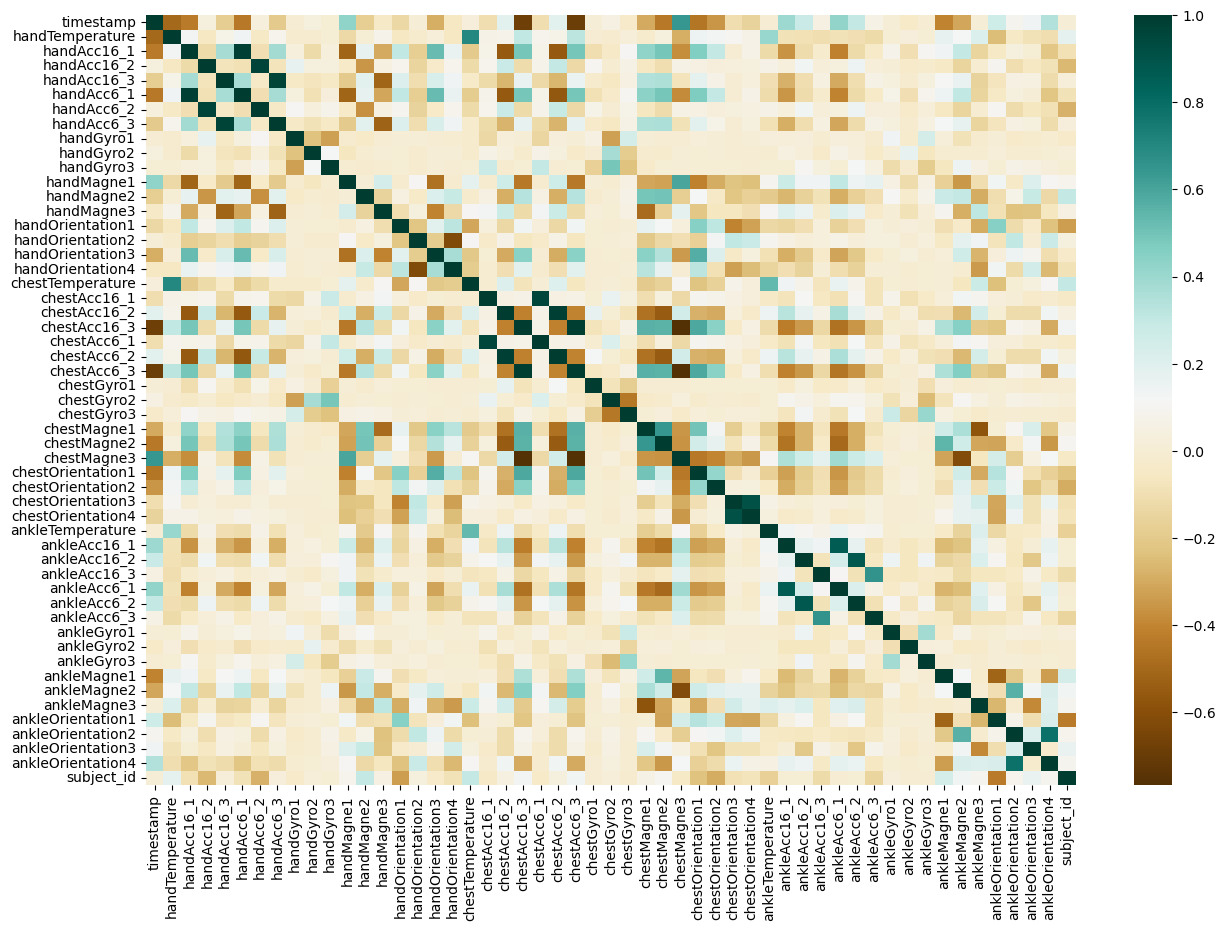

In [9]:
from pandas.plotting import scatter_matrix
import seaborn as sns
import numpy as np

df_corr = df.corr()

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=np.bool), cmap = "BrBG",ax=ax)
plt.show()

In [10]:
print(0.3+0.7*0.4+0.7*0.6*0.6+0.7*0.6*0.4*0.7)

0.9496


**Библиотека визуализации пропусков:**

`pip install missingno`

In [11]:
! pip install missingno

In [12]:
import missingno as msno

<Axes: >

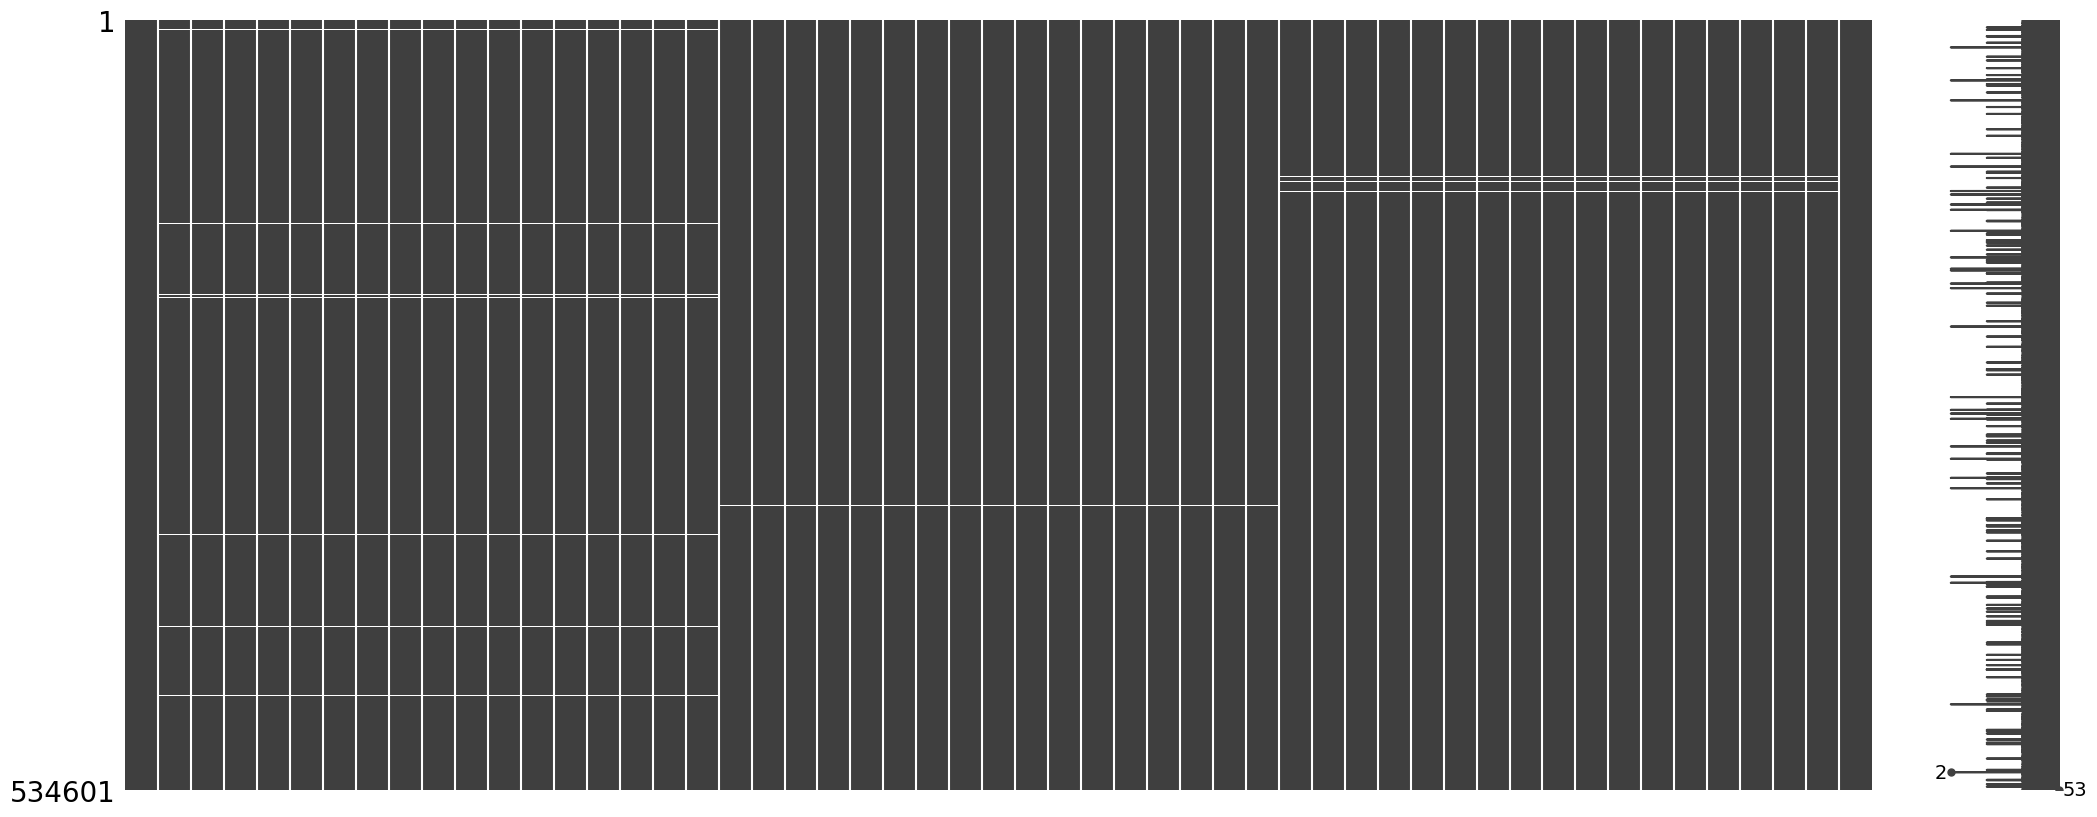

In [13]:
msno.matrix(df)

<Axes: >

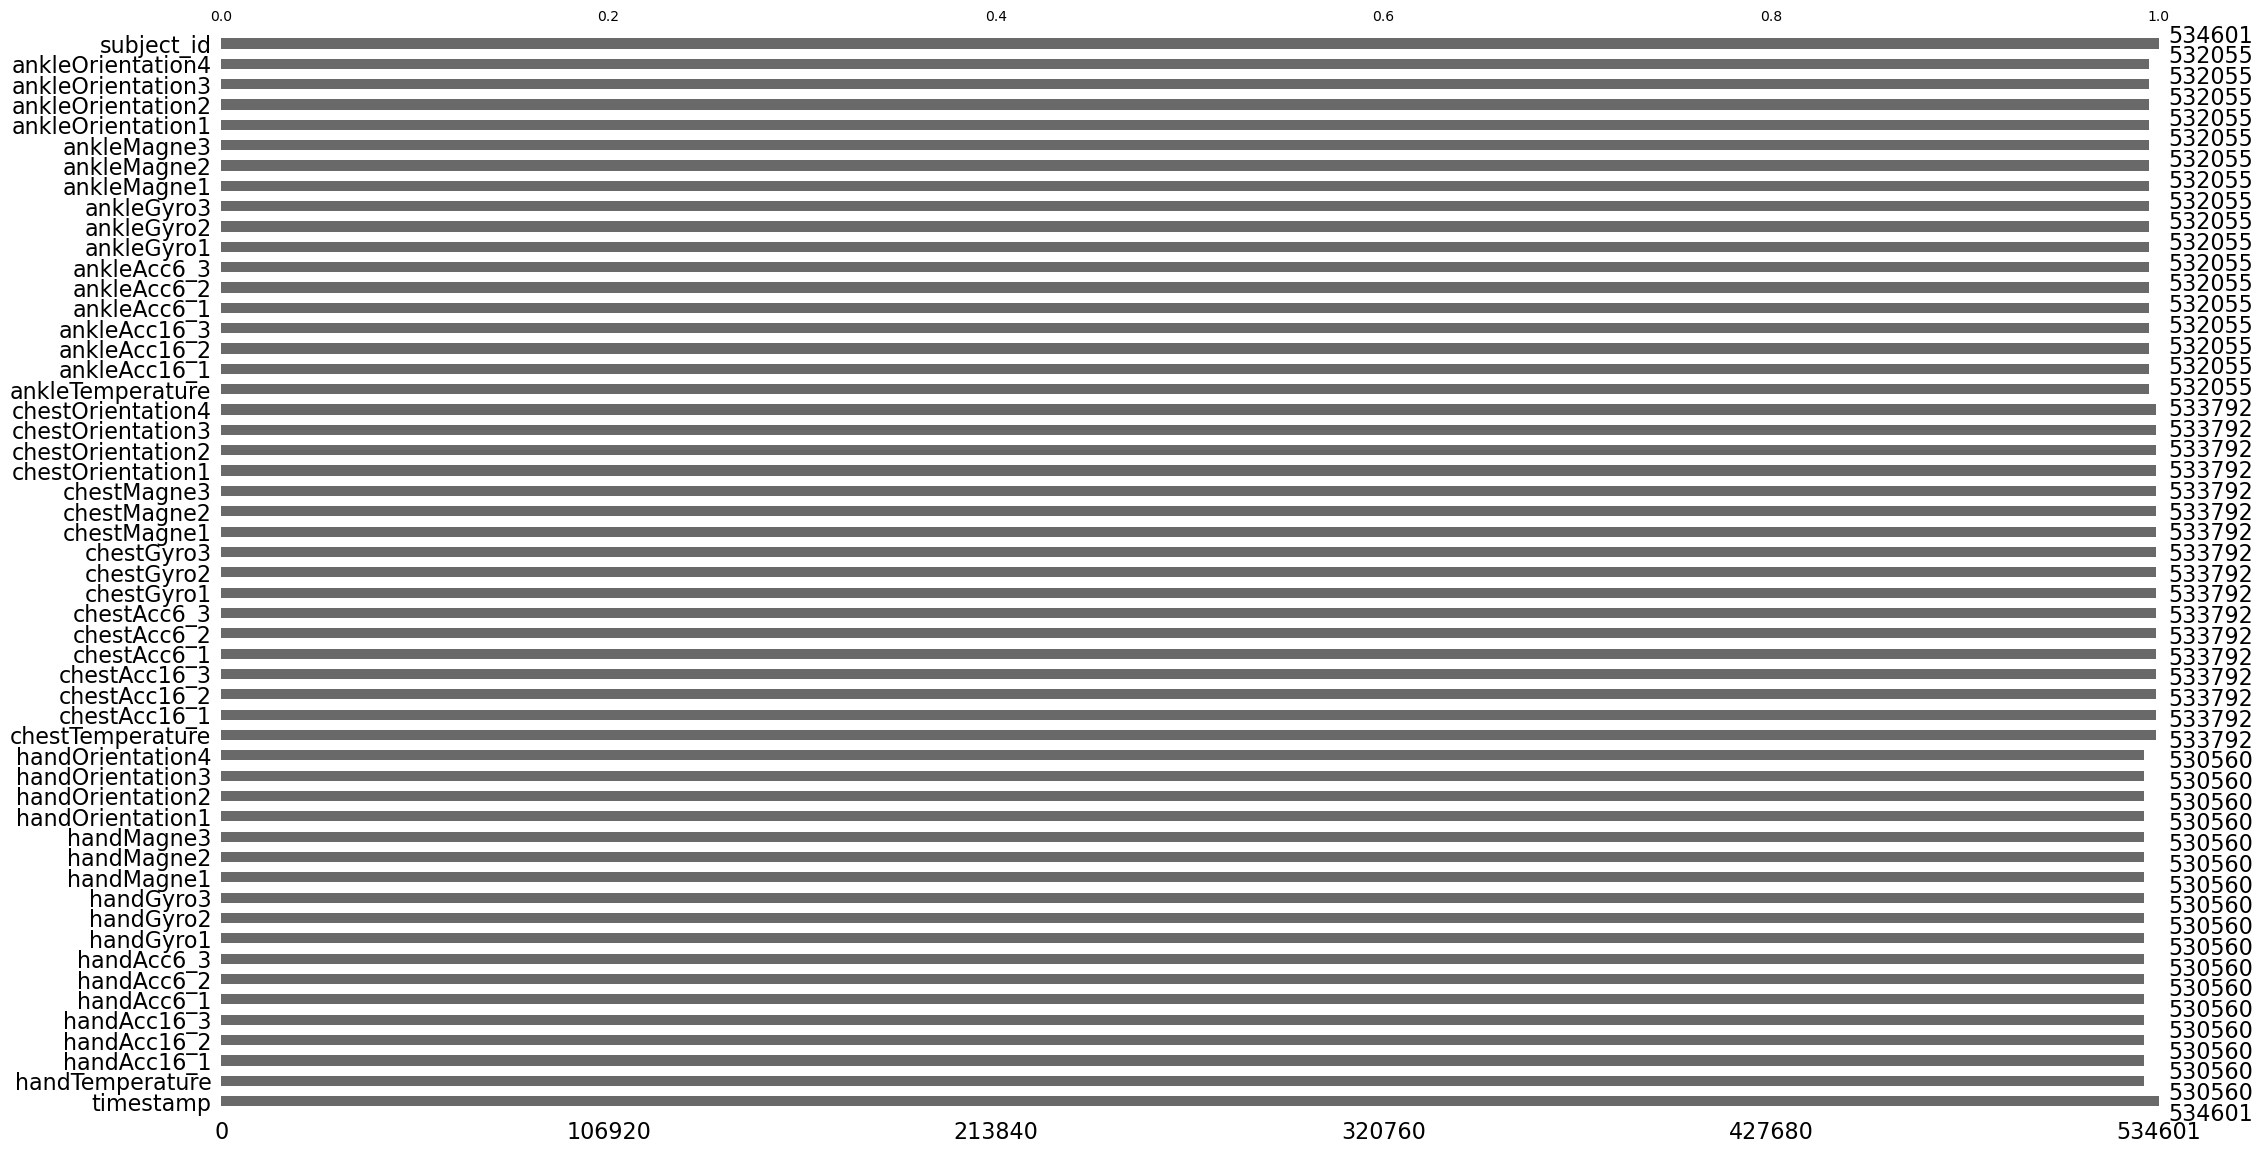

In [14]:
msno.bar(df)

**Как видим в данных у нас имеются множество пропущенных значений.**

Так как датасет собран из реальных данных, то в жизни случается всякое.

Пустые значения в данном случае могут быть обусловлены следующими факторами:
* Потеря данных из-за использования беспроводных датчиков.
* Проблемы с настройкой оборудования, вызывающие, например. потерю соединения с датчиками или системный сбой.

Существуют две основные стратегии при работе с пропусками:
1. Удаление пропущенных значений
2. Заполнение пропусков

**Удаление.**

При удалении пропусков можно:
1. Удалять как целиком какой-то признак (например, если больше 70% для этого признака это пропуски, тогда мы можем целиком удалить данный столбец):
`df.drop(columns='name'])`

2. Удалить можно объекты у которых имеются пропущенные значения, т.е. в данном случае мы удаляем строки. *Но будьте внимательны так как удалять из тестового набора данных не всегда возможно, иначе размерность ответов не совпадет.*
`df.dropna()`

In [15]:
# В качестве примера удалим из набора данных признаки, пропуски в которых превыщают 4 000
df.drop(columns=['handTemperature', 'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'handAcc16_3', 'handAcc6_1', 'handAcc6_2', 'handAcc6_3',
                 'handGyro1', 'handGyro2', 'handGyro3', 'handMagne1', 'handMagne2', 'handMagne3', 'handOrientation1', 'handOrientation2',
                 'handOrientation3', 'handOrientation4'], inplace=True)
df.isna().sum()

timestamp               0
chestTemperature      809
chestAcc16_1          809
chestAcc16_2          809
chestAcc16_3          809
chestAcc6_1           809
chestAcc6_2           809
chestAcc6_3           809
chestGyro1            809
chestGyro2            809
chestGyro3            809
chestMagne1           809
chestMagne2           809
chestMagne3           809
chestOrientation1     809
chestOrientation2     809
chestOrientation3     809
chestOrientation4     809
ankleTemperature     2546
ankleAcc16_1         2546
ankleAcc16_2         2546
ankleAcc16_3         2546
ankleAcc6_1          2546
ankleAcc6_2          2546
ankleAcc6_3          2546
ankleGyro1           2546
ankleGyro2           2546
ankleGyro3           2546
ankleMagne1          2546
ankleMagne2          2546
ankleMagne3          2546
ankleOrientation1    2546
ankleOrientation2    2546
ankleOrientation3    2546
ankleOrientation4    2546
subject_id              0
dtype: int64

**Заполнение.**

При заполнении пропусков также существует множество различных стратегий:
- заполнение пропусков с помощью **среднего/медианы/максимума/минимум** по данному признаку.
- при категориальных признаках пропуски можно заполнить пропущенные значения с помощью наиболее часто встречающейся категории по данному признаку (**модой**).
- используя **интерполяцию** - нахождение неизвестных промежуточных значений некоторой функции, по имеющемуся дискретному набору её известных значений, определенным способом.
- используя различные **другие алгоритмы машинного обучения** для заполнения пропусков (представьте, что все строки с пропусками - это тестовый набор данных, для которого вам нужно вернуть ответ).

Табличка в помощь:
https://help.loginom.ru/userguide/processors/preprocessing/imputation.html

In [16]:
df.columns

Index(['timestamp', 'chestTemperature', 'chestAcc16_1', 'chestAcc16_2',
       'chestAcc16_3', 'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3',
       'chestGyro1', 'chestGyro2', 'chestGyro3', 'chestMagne1', 'chestMagne2',
       'chestMagne3', 'chestOrientation1', 'chestOrientation2',
       'chestOrientation3', 'chestOrientation4', 'ankleTemperature',
       'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3', 'ankleAcc6_1',
       'ankleAcc6_2', 'ankleAcc6_3', 'ankleGyro1', 'ankleGyro2', 'ankleGyro3',
       'ankleMagne1', 'ankleMagne2', 'ankleMagne3', 'ankleOrientation1',
       'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4',
       'subject_id'],
      dtype='object')

In [17]:
# Заполним пропуски с помощью среднего значения

col_missing = ['chestTemperature', 'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 'chestAcc6_1', 'chestAcc6_2',
               'chestAcc6_3', 'chestGyro1', 'chestGyro2', 'chestGyro3', 'chestMagne1',
               'chestMagne2', 'chestMagne3', 'chestOrientation1', 'chestOrientation2',
               'chestOrientation3', 'chestOrientation4', 'ankleTemperature',
               'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3', 'ankleAcc6_1',
               'ankleAcc6_2', 'ankleAcc6_3', 'ankleGyro1', 'ankleGyro2', 'ankleGyro3',
               'ankleMagne1', 'ankleMagne2', 'ankleMagne3', 'ankleOrientation1',
               'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4']

for i in col_missing:
    df[i].fillna(df[i].mean(), inplace=True)

df.isna().sum()

timestamp            0
chestTemperature     0
chestAcc16_1         0
chestAcc16_2         0
chestAcc16_3         0
chestAcc6_1          0
chestAcc6_2          0
chestAcc6_3          0
chestGyro1           0
chestGyro2           0
chestGyro3           0
chestMagne1          0
chestMagne2          0
chestMagne3          0
chestOrientation1    0
chestOrientation2    0
chestOrientation3    0
chestOrientation4    0
ankleTemperature     0
ankleAcc16_1         0
ankleAcc16_2         0
ankleAcc16_3         0
ankleAcc6_1          0
ankleAcc6_2          0
ankleAcc6_3          0
ankleGyro1           0
ankleGyro2           0
ankleGyro3           0
ankleMagne1          0
ankleMagne2          0
ankleMagne3          0
ankleOrientation1    0
ankleOrientation2    0
ankleOrientation3    0
ankleOrientation4    0
subject_id           0
dtype: int64

In [18]:
df = df.drop(columns=['timestamp'])

In [19]:
df.isna().sum()

chestTemperature     0
chestAcc16_1         0
chestAcc16_2         0
chestAcc16_3         0
chestAcc6_1          0
chestAcc6_2          0
chestAcc6_3          0
chestGyro1           0
chestGyro2           0
chestGyro3           0
chestMagne1          0
chestMagne2          0
chestMagne3          0
chestOrientation1    0
chestOrientation2    0
chestOrientation3    0
chestOrientation4    0
ankleTemperature     0
ankleAcc16_1         0
ankleAcc16_2         0
ankleAcc16_3         0
ankleAcc6_1          0
ankleAcc6_2          0
ankleAcc6_3          0
ankleGyro1           0
ankleGyro2           0
ankleGyro3           0
ankleMagne1          0
ankleMagne2          0
ankleMagne3          0
ankleOrientation1    0
ankleOrientation2    0
ankleOrientation3    0
ankleOrientation4    0
subject_id           0
dtype: int64

## Кластеризация

Для кластеризации в данном примере мы будем использовать **KMeans**.

In [20]:
%%time
from sklearn.cluster import KMeans

n_clusters = 10

clusterer = KMeans(n_clusters=n_clusters)

cluster_labels = clusterer.fit_predict(df)

# inertia
inertia = clusterer.inertia_

CPU times: total: 1min 1s
Wall time: 10.7 s


In [21]:
print("For n_clusters =", n_clusters,
      ", the inertia is :", inertia)

For n_clusters = 10 , the inertia is : 472678365.9868776


In [22]:
%%time
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df, cluster_labels)

KeyboardInterrupt: 

**Как оценить качество получившегося кластерного разбиения?**

**Коэффициент Силуэтта**

К-т Силуэтта (англ *Silhouette*) - это метрика, которая не предполагает знания истинных меток объектов, и позволяет оценить качество кластеризации, используя только саму (неразмеченную) выборку и результат кластеризации.

Интуитивное описание метрики:
* точки внутри кластера должны лежать очень близко друг к другу, то есть кластер должен быть *плотным*
* сами кластера должны лежать как можно дальше друг от друга

Метрика силуэта позволяет учитывать оба этих факта в одной формуле.

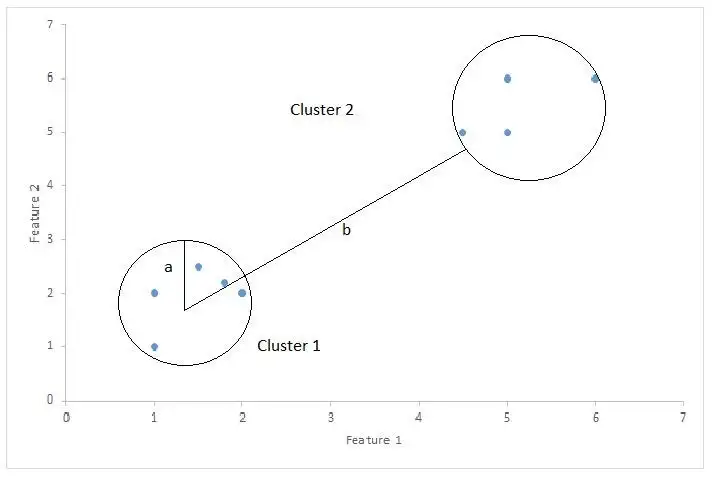

Чтобы вычислить его для каждого объекта нужно вычислить для каждого объекта выборки две величины, $a$ (среднее расстояние от данного объекта до объектов из того же кластера) и $b$ (среднее расстояние от данного объекта до объектов из ближайшего кластера (отличного от того, в котором лежит сам объект)).

Силуэтом объекта назовём нормализованную разность между этими величинами

$$
s = \frac{b-a}{\max(a,b)}
$$

Силуэтом выборки называется средняя величина силуэта объектов данной выборки. Таким образом, силуэт показывает, насколько среднее расстояние до объектов своего кластера отличается от среднего расстояния до объектов других кластеров. Эта величина меняется в интервале от $-1$ до $1$:

* -1 значит что кластера плохие, размытые
* 0 значит что кластера накладываются друг на друга
* 1 значит что кластера плотные и хорошо отделены друг от друга

Таким образом, чем ближе значение к-та Силуэтта в единице, тем лучше. Все, что больше $0.5$ хорошие значения, всё что меньше - надо улучшать.

**Инерция**

Инерция показывает, насколько когерентны различные кластеры.

Вычисляется по следующей формуле:

$inertia = \sum_{i=1}^N (x_i - C_k)$

* N — количество выборок в наборе данных
* C — центр кластера.

Таким образом, Inertia просто вычисляет квадрат расстояния от каждой выборки в кластере до его центра кластера и суммирует их. Этот процесс выполняется для каждого кластера и всех выборок в этом наборе данных. Чем меньше значение Inertia, тем более когерентны различные кластеры. Когда добавляется столько кластеров, сколько имеется выборок в наборе данных, значение инерции будет равно нулю.

In [ ]:
print("For n_clusters =", n_clusters,
      ", the silhouette is :", silhouette_avg)

For n_clusters = 10 , the silhouette is : 0.446297798352115


(53460, 53)


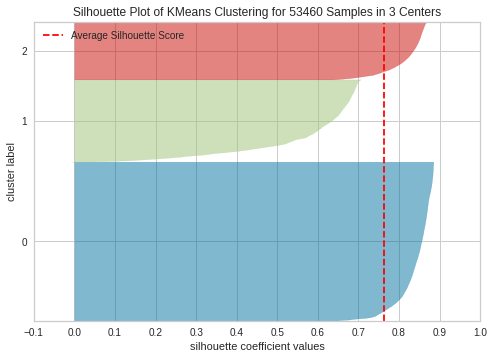

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f18cfa91590>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=3, random_state=42))

In [ ]:
from yellowbrick.cluster import silhouette_visualizer

X = df.sample(frac=0.1)
print(X.shape)
silhouette_visualizer(KMeans(3, random_state=42), X, colors='yellowbrick')

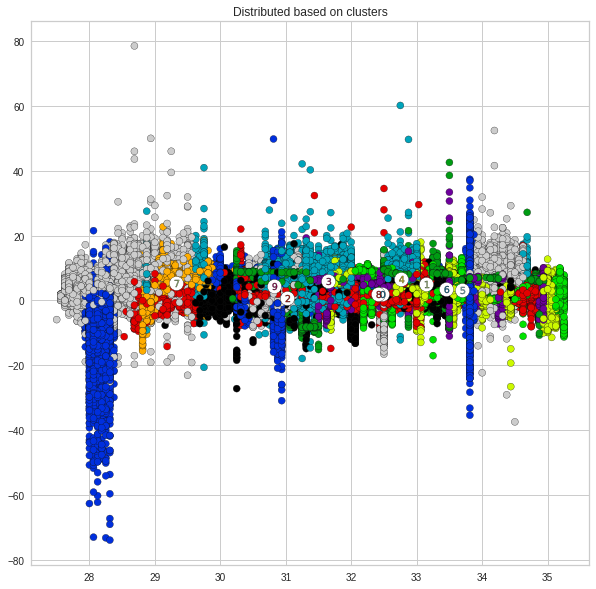

In [ ]:
plt.figure(figsize=(10,10))

plt.scatter(df.iloc[:, 1], df.iloc[:, 4], c=cluster_labels, edgecolor='k')

centers = clusterer.cluster_centers_

plt.scatter(centers[:, 1], centers[:, 4], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    plt.scatter(c[1], c[4], marker='$%d$' % i, alpha=1,
                s=50, edgecolor='k')

plt.title("Distributed based on clusters");

In [ ]:
import numpy as np

len(np.unique(cluster_labels))

10

## Оптимальное количество кластеров

**В данном примере, мы выбрали рандомное число кластеров. И тут встает вопрос как подобрать оптимальное и подходящее количество кластеров для датасета?**

https://habr.com/ru/company/jetinfosystems/blog/467745/

Собственно используя коэффицент Силуэта и инерцию, можно подобрать оптимальное количество кластеров, а также гиперпараметры для KMeans.

**Существует несколько различных стратегий подбора оптимального количества кластеров:**
1. Метод локтя
2. Gap-Statistics (https://towardsdatascience.com/k-means-clustering-and-the-gap-statistics-4c5d414acd29)
3. Метод силуэтов https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

### Метод локтя

**Метод локтя** – один из самых известных методов, с помощью которого вы можете выбрать правильное значение k и повысить производительность Модели (Model). Этот эмпирический метод вычисляет сумму квадратов расстояний между точками и вычисляет Среднее значение (Mean).

**Метод "локтя" (elbow method)** рассматривает характер изменения разброса  $W_{total}$  с увеличением числа групп  $k$ . Объединив все {n} наблюдений в одну группу, мы имеем наибольшую внутрикластерную дисперсию, которая будет снижаться до 0 при  $k→n$ . На каком-то этапе можно усмотреть, что снижение этой дисперсии замедляется - на графике это происходит в точке, называемой "локтем". Построить такой график можно в результате прямого перебора.

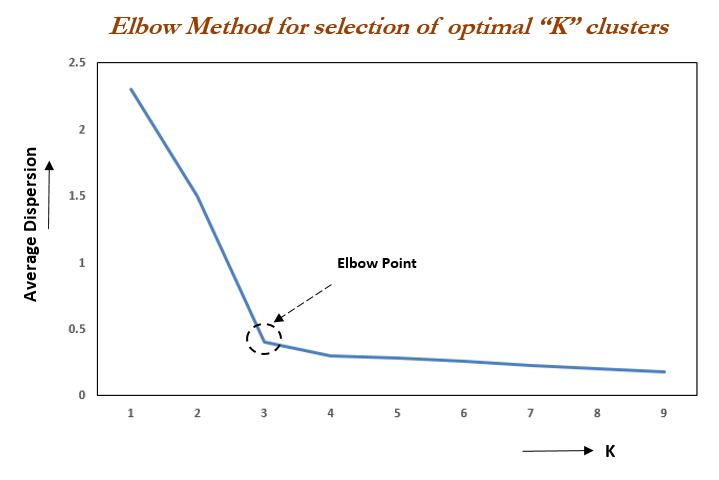

In [ ]:
%%time

inertia_df = pd.DataFrame(data=[], index=range(3, 12), columns=['inertia'])

for n_clusters in range(3, 12):
    clusterer = KMeans(n_clusters=n_clusters,  random_state=42)
    cluster_labels = clusterer.fit_predict(df)

    # inertia
    inertia_df.loc[n_clusters] = clusterer.inertia_

CPU times: user 6min 18s, sys: 20.9 s, total: 6min 39s
Wall time: 3min 54s


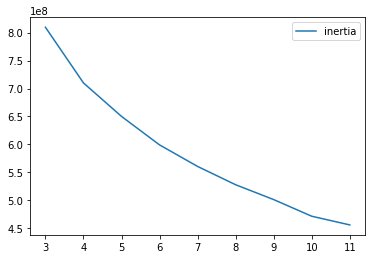

In [ ]:
inertia_df.plot()

In [ ]:
cluster_labels

array([1, 2, 4, ..., 0, 3, 4], dtype=int32)

## Подготовка ответов

In [ ]:
predictions = pd.DataFrame(cluster_labels, columns=['activityID'])
predictions = predictions.reset_index()

predictions

,index,activityID
0,0,4
1,1,7
2,2,1
3,3,3
4,4,1
...,...,...
534596,534596,2
534597,534597,8
534598,534598,8
534599,534599,2


In [ ]:
predictions['activityID'].unique()

array([4, 7, 1, 3, 8, 5, 9, 0, 6, 2], dtype=int32)

**Пример того как преобразовать номера кластеров.**

In [ ]:
import pandas as pd

d = {"f1":pd.Series([100, 20, 3, 5, 200, 400, 2, 282]),
     "f2": pd.Series(['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8']),
     "label": pd.Series([2, 0, 1, 1, 2, 0, 1, 2])}


df0 = pd.DataFrame(d)
df0

,f1,f2,label
0,100,v1,2
1,20,v2,0
2,3,v3,1
3,5,v4,1
4,200,v5,2
5,400,v6,0
6,2,v7,1
7,282,v8,2


In [ ]:
df0['label'].unique()

array([2, 0, 1])

In [ ]:
df0['label'].unique()

df0['new_label'] = -1

for index, row in df0.iterrows():
    if row['label'] == 2:
        df0.loc[index, 'new_label'] = 1
    if row['label'] == 0:
        df0.loc[index, 'new_label'] = 2
    if row['label'] == 1:
        df0.loc[index, 'new_label'] = 3

df0

,f1,f2,label,new_label
0,100,v1,2,1
1,20,v2,0,2
2,3,v3,1,3
3,5,v4,1,3
4,200,v5,2,1
5,400,v6,0,2
6,2,v7,1,3
7,282,v8,2,1


# Самостоятельная работа по кластеризации физической активности.

In [85]:
import pandas as pd

data = pd.read_csv('files//Physical_Activity_Monitoring_unlabeled.csv')

pd.concat([data.head(), data.tail()])

,timestamp,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,252.75,34.8750,0.902847,7.45872,6.032490,1.006100,7.44575,6.303650,-0.021952,0.004114,...,-0.025606,0.030239,-14.54470,27.3336,-5.766200,0.206416,0.348212,0.763201,-0.503652,5
1,3652.45,29.7500,-4.069330,3.76168,8.279720,-5.972500,3.22273,6.908970,0.116054,-0.375968,...,-0.670163,1.786200,-32.82570,-15.7719,-1.313950,0.578332,-0.566734,0.405888,-0.423791,2
2,504.76,34.3750,-2.007540,-9.60180,0.773674,-1.803500,-9.58937,1.073680,0.020131,0.042189,...,-0.009741,-0.006579,-18.81710,16.3089,25.292800,0.139776,0.676586,0.393796,0.606316,8
3,2801.61,31.9375,-13.262200,5.85443,0.899334,-13.611500,5.91511,0.840377,1.715630,-0.050492,...,-0.163470,-3.495570,-26.74180,34.3566,21.327400,0.416303,0.783387,0.306464,0.345075,2
4,441.01,33.5000,-0.013940,8.66540,4.398210,0.144153,8.56816,4.822200,-0.006938,-0.007383,...,-0.028172,-0.003737,-17.77980,-3.9981,10.995000,0.171133,-0.748343,0.252988,-0.588807,6
534596,3479.53,33.8750,-9.084250,4.70122,2.890170,-9.689610,6.78077,3.975430,-0.157406,0.774189,...,0.424520,-0.856836,-25.00990,-23.5557,23.615300,0.318171,-0.701921,0.555778,-0.311745,5
534597,2448.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.767710,-3.050980,-35.70240,31.8018,16.421800,0.435887,0.660643,0.371665,0.485200,5
534598,2479.84,34.6875,-6.367550,2.32131,2.207640,-6.362460,2.33049,2.607610,0.206349,-0.359415,...,-0.034144,-0.402013,-49.69220,20.6039,-0.917908,0.561652,0.297957,0.756767,0.151899,5
534599,3437.82,28.0625,5.461940,10.43640,-9.073300,8.348860,5.76518,-6.143210,3.543910,2.757300,...,0.352062,-5.577750,-34.15510,-11.0786,39.737500,0.062163,-0.798705,-0.056668,-0.595815,6
534600,811.75,33.3125,-9.225910,2.00606,2.627730,-9.076460,1.97274,2.837680,-0.001754,-0.017191,...,-0.016041,0.005842,-1.01141,-16.4092,15.181500,0.324008,-0.710975,0.227375,-0.581235,4


In [75]:
data.shape

(534601, 53)

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534601 entries, 0 to 534600
Data columns (total 53 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   timestamp          534601 non-null  float64
 1   handTemperature    530560 non-null  float64
 2   handAcc16_1        530560 non-null  float64
 3   handAcc16_2        530560 non-null  float64
 4   handAcc16_3        530560 non-null  float64
 5   handAcc6_1         530560 non-null  float64
 6   handAcc6_2         530560 non-null  float64
 7   handAcc6_3         530560 non-null  float64
 8   handGyro1          530560 non-null  float64
 9   handGyro2          530560 non-null  float64
 10  handGyro3          530560 non-null  float64
 11  handMagne1         530560 non-null  float64
 12  handMagne2         530560 non-null  float64
 13  handMagne3         530560 non-null  float64
 14  handOrientation1   530560 non-null  float64
 15  handOrientation2   530560 non-null  float64
 16  ha

In [77]:
data.select_dtypes([object]).columns

Index([], dtype='object')

In [78]:
data.drop(columns=data.columns[data.isna().sum() > 4000], inplace=True)

Для физической активности часто данные могут быть шумными или иметь выбросы (например, неожиданно высокие значения активности). В таком случае медиана может быть предпочтительным методом заполнения пропусков.

In [79]:
for col in data.columns[data.isna().sum() > 0].tolist():
    data[col].fillna(data[col].median(), inplace=True)

In [63]:
data.isna().any().any()

False

<Axes: >

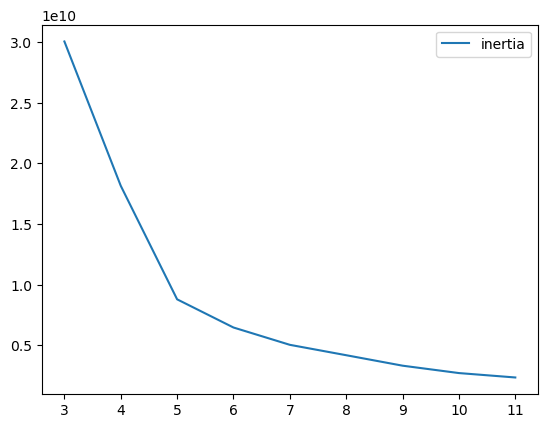

In [52]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data = pca.fit_transform(data)

inertia_data = pd.DataFrame(data=[], index=range(3, 12), columns=['inertia'])

for n_clusters in range(3, 12):
    clusterer = KMeans(n_clusters=n_clusters,  random_state=42)
    cluster_labels = clusterer.fit_predict(data)

    inertia_data.loc[n_clusters] = clusterer.inertia_

inertia_data.plot()

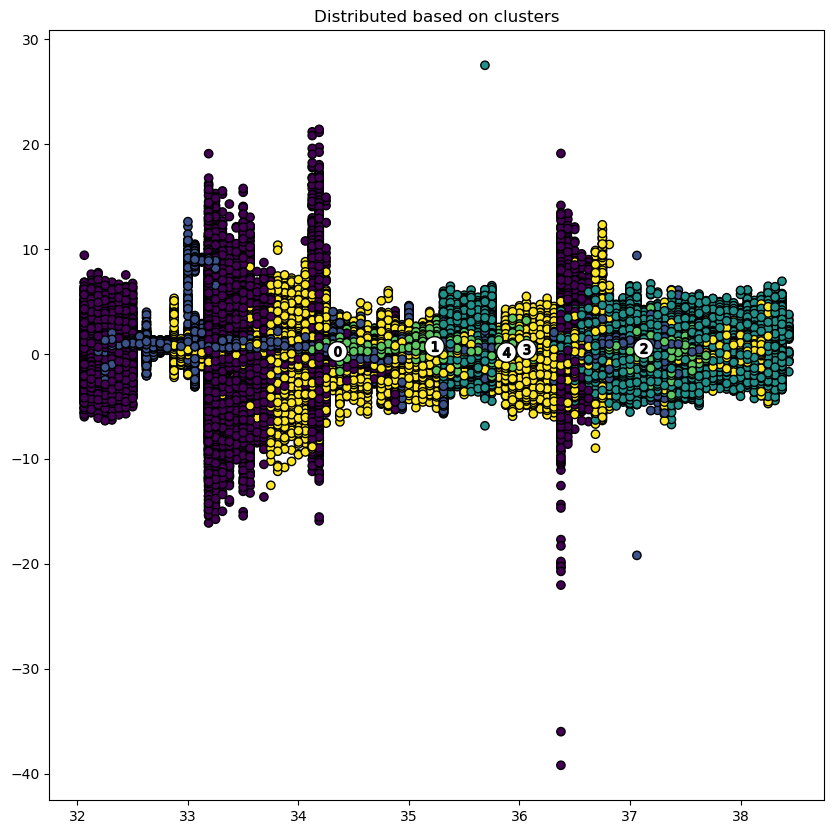

In [67]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(data)

centers = kmeans.cluster_centers_

plt.figure(figsize=(10, 10))

plt.scatter(data.iloc[:, 1], data.iloc[:, 2], c=cluster_labels, edgecolor='k')

plt.scatter(centers[:, 1], centers[:, 2], marker='o', c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    plt.scatter(c[1], c[2], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

plt.title("Distributed based on clusters")
plt.show()


**k-Means**

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_clusters = 3

kMEANS = KMeans(n_clusters=n_clusters)
cluster_labels = kMEANS.fit_predict(data)

inertia = kMEANS.inertia_

print(f'Инерция для кол-ва кластеров : {n_clusters} = {kMEANS.inertia_}')
print(f'Коэффициент силуэта для кол-ва кластеров : {n_clusters} = {silhouette_score(data, cluster_labels)}')

Инерция для кол-ва кластеров : 3 = 30858033091.47037
Коэффициент силуэта для кол-ва кластеров : 3 = 0.7699565024319748


In [80]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

pca = PCA(n_components=3)
data = pca.fit_transform(data)

n_clusters = 3

kMEANS = KMeans(n_clusters=n_clusters)
cluster_labels = kMEANS.fit_predict(data)

#print(f'Инерция для кол-ва кластеров : {n_clusters} = {kMEANS_5.inertia_}')
#print(f'Коэффициент силуэта для кол-ва кластеров : {n_clusters} = {silhouette_score(data, cluster_labels)}')

**DBSCAN**

In [48]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(min_samples=3, eps=1.5)
cluster_labels_dbscan = dbscan.fit_predict(data)

**Agglomerative Clustering**

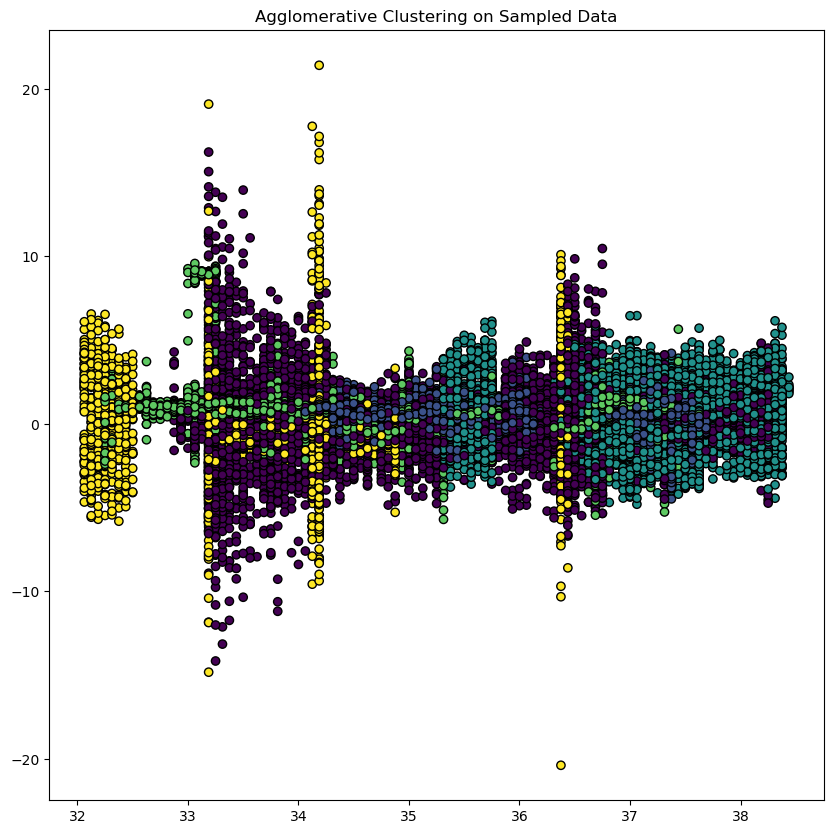

In [70]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

data_sample = data.sample(frac=0.1, random_state=42)

agg_clustering = AgglomerativeClustering(n_clusters=5)
cluster_labels_sample = agg_clustering.fit_predict(data_sample)

plt.figure(figsize=(10, 10))
plt.scatter(data_sample.iloc[:, 1], data_sample.iloc[:, 2], c=cluster_labels_sample, edgecolor='k')
plt.title("Agglomerative Clustering on Sampled Data")
plt.show()


**Позаимствованно с kaggle и доработано**
(https://www.kaggle.com/code/denisgubankov/physical-activity-clustering-yet-another-solution#Samsung-Innovation-Campus-Machine-Learning-Bootcamp-2022)**

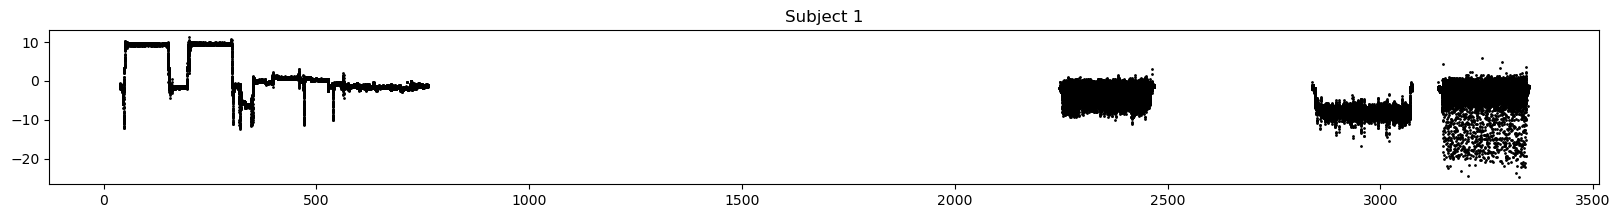

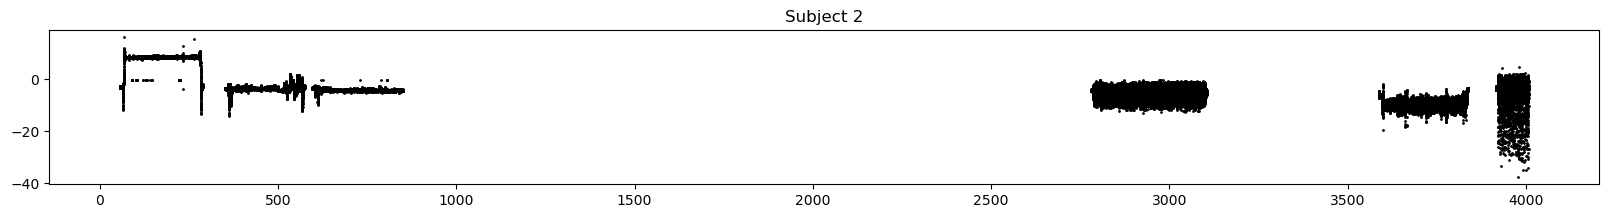

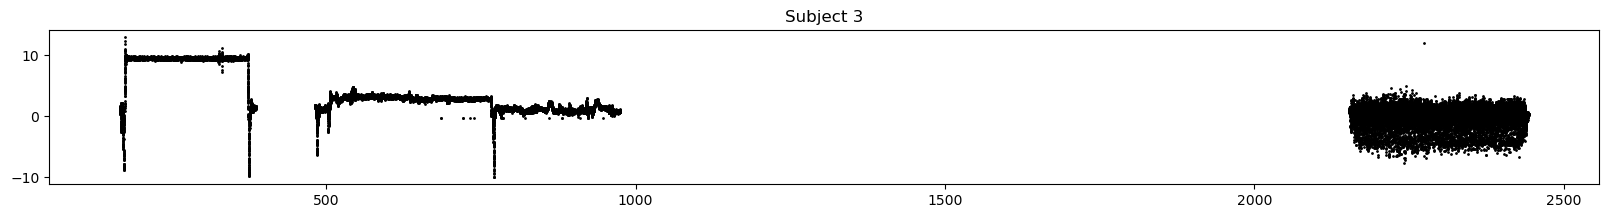

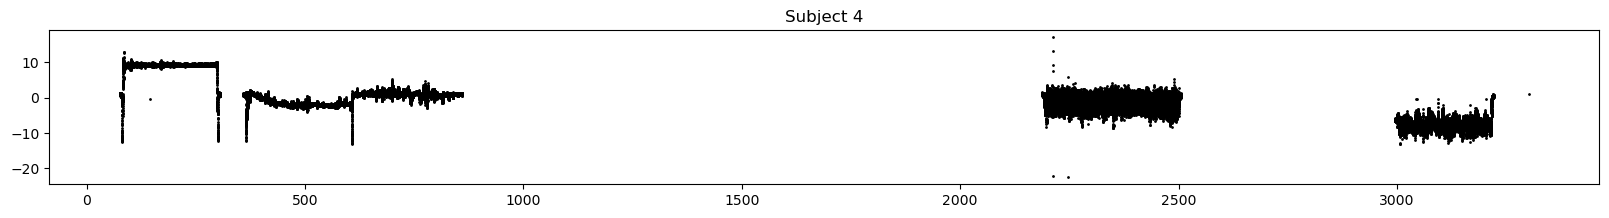

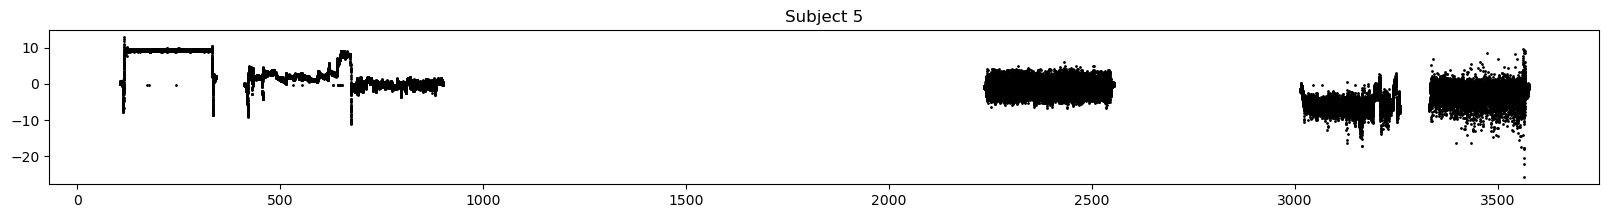

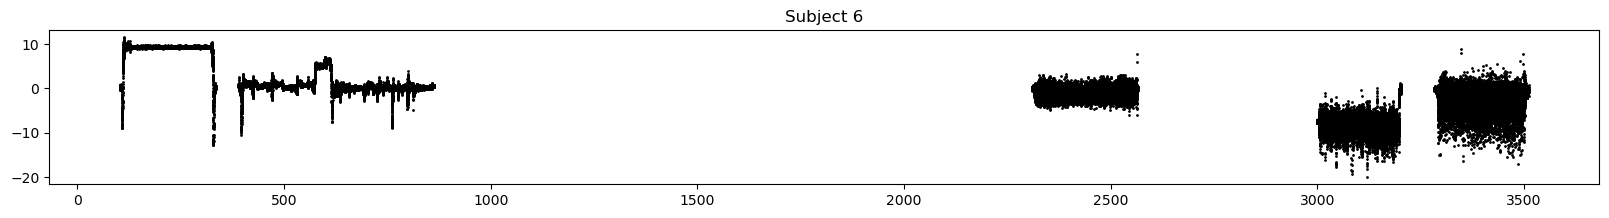

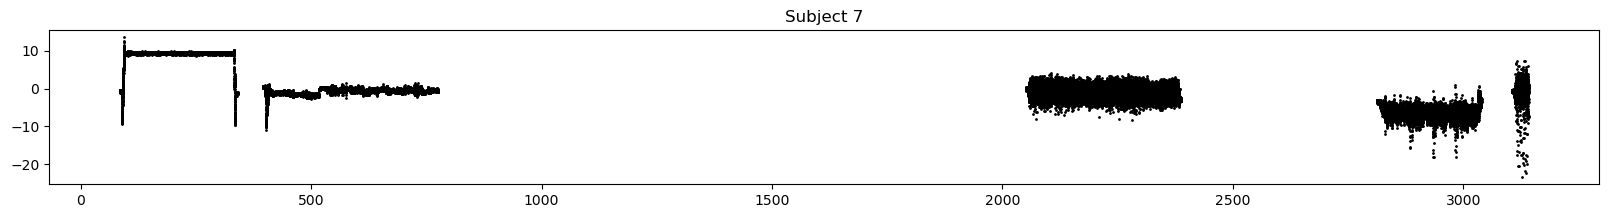

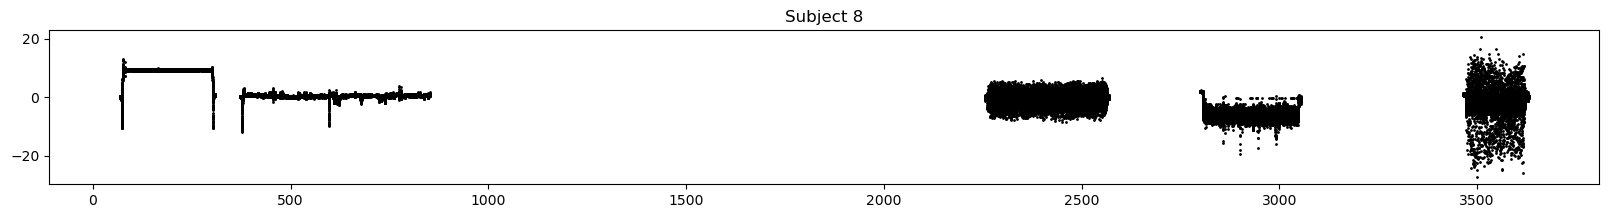

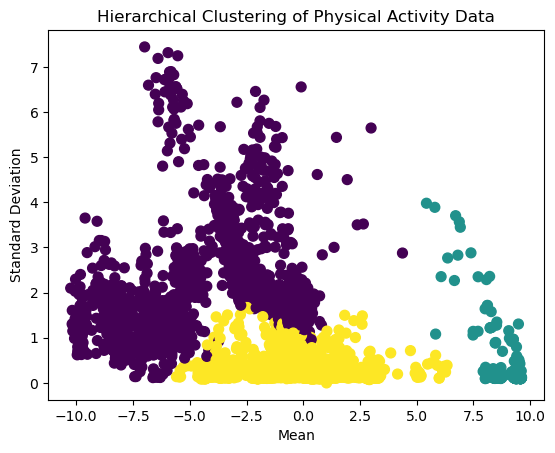

c:\Users\Admin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Admin\anaconda3\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


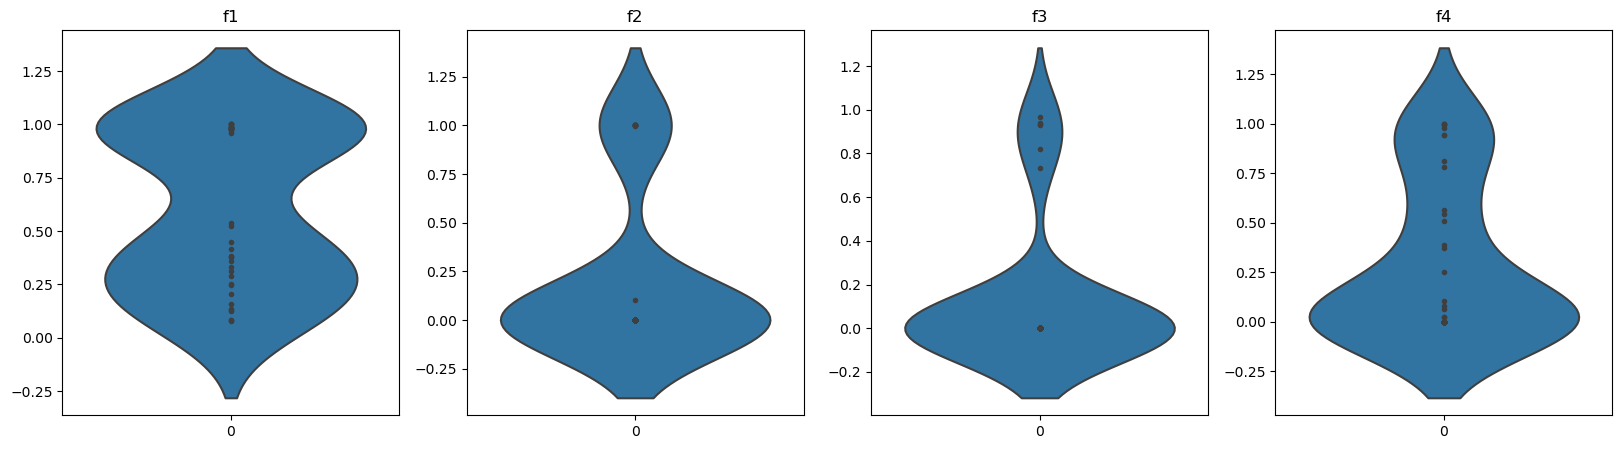

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Загрузка данных
data = pd.read_csv('files//Physical_Activity_Monitoring_unlabeled.csv')

data.drop(columns=data.columns[data.isna().sum() > 4000], inplace=True)

for col in data.columns[data.isna().sum() > 0].tolist():
    data[col].fillna(data[col].median(), inplace=True)

# Выбор необходимых столбцов
data = data[['timestamp', 'chestAcc16_3', 'subject_id']]
data["i"] = data.index

# Группировка данных по субъектам
subjects = []
for i in sorted(data['subject_id'].unique()):
    d = data.loc[data['subject_id'] == i].sort_values(by='timestamp')
    d.index = d.timestamp
    d.drop(columns='subject_id', inplace=True)
    subjects.append(d)

# Визуализация данных
for i in range(len(subjects)):
    plt.figure(figsize=(20, 2))
    plt.scatter(subjects[i]["chestAcc16_3"].index, subjects[i]["chestAcc16_3"], c="black", s=1)
    plt.title("Subject " + str(i + 1))
    plt.show()

# Определение временных окон
timelines = []
for i in range(len(subjects)):
    subjects[i]["dt"] = subjects[i]["timestamp"].diff(1)
    bounds = subjects[i][subjects[i]["dt"] >= 1]["timestamp"].values
    timelines.append(subjects[i].loc[subjects[i]["timestamp"] < bounds[0], ['chestAcc16_3', 'i']])
    for j in range(len(bounds) - 1):
        timelines.append(subjects[i].loc[
            (subjects[i]["timestamp"] >= bounds[j]) & (subjects[i]["timestamp"] < bounds[j + 1]),
            ['chestAcc16_3', 'i']])
    timelines.append(subjects[i].loc[subjects[i]["timestamp"] >= bounds[-1], ['chestAcc16_3', 'i']])
timelines.append(timelines[0].loc[(timelines[0].index <= 303.32)])
timelines.append(timelines[0].loc[(timelines[0].index > 303.32)])
del timelines[0]

# Извлечение признаков и расчет 's'
for i in range(len(timelines)):
    timelines[i]["t"] = timelines[i].index
    timelines[i]["dt"] = timelines[i]["t"].diff(1)
    timelines[i]["s"] = timelines[i]["chestAcc16_3"].diff(1)
    timelines[i]["s"] = np.abs(timelines[i]["s"] / timelines[i]["dt"])
    timelines[i].drop(columns=["t", "dt"], inplace=True)  # Удаляем временные столбцы

# Извлечение признаков для каждого временного окна
def extract_features(window):
    return {
        'mean': np.mean(window),
        'std': np.std(window),
        'min': np.min(window),
        'max': np.max(window),
        'median': np.median(window)
    }

features_list = []
for timeline in timelines:
    windows = [timeline['chestAcc16_3'].iloc[i:i + 100] for i in range(0, len(timeline), 100)]
    for window in windows:
        features_list.append(extract_features(window))

# Преобразование в DataFrame
features_df = pd.DataFrame(features_list)

# Стандартизация признаков
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_df)

# Кластеризация с использованием Agglomerative Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
features_df['cluster'] = hierarchical.fit_predict(features_scaled)

# Визуализация результатов кластеризации
plt.scatter(features_df['mean'], features_df['std'], c=features_df['cluster'], cmap='viridis', s=50)
plt.xlabel('Mean')
plt.ylabel('Standard Deviation')
plt.title('Hierarchical Clustering of Physical Activity Data')
plt.show()

# Признаки для классов без движения/медленным движением
bins = [0, 50, 5000]
f1 = []
counts, _ = np.histogram(data_timelines["s"], bins=bins)
for n in range(len(timelines)):
    f1_block = []
    for i in np.arange(np.min(timelines[n].index), np.max(timelines[n].index), 10):
        counts_block, _ = np.histogram(timelines[n].loc[(timelines[n].index >= i) & (timelines[n].index < (i + 10)), "s"], bins=bins)
        counts_block = counts_block / counts
        counts_block = counts_block / np.sum(counts_block)
        f1_block.append(counts_block[0])
    f1.append(np.median(f1_block))

# Признак для класса без движения/медленным движением, основная масса точек в котором около 9.5
bins = [-30, 8, 30]
counts, _ = np.histogram(data_timelines["chestAcc16_3"], bins=bins)
f2 = []
for n in range(len(timelines)):
    f2_block = []
    for i in np.arange(np.min(timelines[n].index), np.max(timelines[n].index), 10):
        counts_block, _ = np.histogram(timelines[n].loc[(timelines[n].index >= i) & (timelines[n].index < (i + 10)), "chestAcc16_3"], bins=bins)
        counts_block = counts_block / counts
        counts_block = counts_block / np.sum(counts_block)
        f2_block.append(counts_block[1])
    f2.append(np.median(f2_block))

# Признак для класса с циклическим движением и резкими импульсами
bins = [0, 700, 5000]
counts, _ = np.histogram(data_timelines["s"], bins=bins)
f3 = []
for n in range(len(timelines)):
    f3_block = []
    for i in np.arange(np.min(timelines[n].index), np.max(timelines[n].index), 10):
        counts_block, _ = np.histogram(timelines[n].loc[(timelines[n].index >= i) & (timelines[n].index < (i + 10)), "s"], bins=bins)
        counts_block = counts_block / counts
        counts_block = counts_block / np.sum(counts_block)
        f3_block.append(counts_block[1])
    f3.append(np.median(f3_block))

# Признак для класса, в котором циклические движения сменяются плавным движением
bins = [-30, -5, 30]
counts, _ = np.histogram(data_timelines["chestAcc16_3"], bins=bins)
f4 = []
for n in range(len(timelines)):
    f4_block = []
    for i in np.arange(np.min(timelines[n].index), np.max(timelines[n].index), 10):
        counts_block, _ = np.histogram(timelines[n].loc[(timelines[n].index >= i) & (timelines[n].index < (i + 10)), "chestAcc16_3"], bins=bins)
        counts_block = counts_block / counts
        counts_block = counts_block / np.sum(counts_block)
        f4_block.append(counts_block[0])
    f4.append(np.median(f4_block))

# Визуализация признаков
f, ax = plt.subplots(1, 4, figsize=(20, 5))
sns.violinplot(data=f1, inner="point", ax=ax[0])
ax[0].set_title("f1")
sns.violinplot(data=f2, inner="point", ax=ax[1])
ax[1].set_title("f2")
sns.violinplot(data=f3, inner="point", ax=ax[2])
ax[2].set_title("f3")
sns.violinplot(data=f4, inner="point", ax=ax[3])
ax[3].set_title("f4")
plt.show()

# Границы
f1 = [0 if i < 0.75 else 1 for i in f1]
f2 = [0 if i < 0.9 else 1 for i in f2]
f3 = [1 if i > 0.5 else 0 for i in f3]
f4 = [1 if i > 0.9 else 0 for i in f4]

features = pd.DataFrame({"f1": f1, "f2": f2, "f3": f3, "f4": f4}, index=range(len(timelines)))
features["cluster"] = features.apply(lambda x: str(x["f1"]) + str(x["f2"]) + str(x["f3"]) + str(x["f4"]), axis=1)

In [108]:
for i in range(len(timelines)):
  timelines[i]["cluster"]=features.loc[i,"cluster"]
  timelines[i].index=timelines[i]["i"]
  timelines[i]=timelines[i][["cluster"]]

data_result=pd.concat(timelines)

data_result=data_result.reset_index()
data_result=data_result.sort_values(by="i")
data_result.head(10)

,i,cluster
223575,0,1100
88562,1,0001
444160,2,1000
70089,3,0000
307395,4,1000
333451,5,0000
45177,6,1100
15601,7,0001
455794,8,1000
15990,9,0001


In [109]:
'''
Распределение классов на public:
1 : 0.18133
2 : 0.15527
3 : 0.17257
4 : 0.22231
5 : 0.17711
6 : 0.09138
'''
for c in data_result["cluster"].unique():
  print(c,': ',len(data_result[data_result["cluster"]==c])/len(data_result))

1100 :  0.18021290644798643
0001 :  0.15357060686381058
1000 :  0.3514153546289663
0000 :  0.22319075347782738
0010 :  0.09161037858140932


In [110]:
# в 1000 -- 3-й и 5-й классы
c={'1100':1, '0001':2, '1000':5, '0000':4, '0010':6}

data_result["activityID"]=data_result["cluster"].apply(lambda x: c[x])
data_result.head(10)

,i,cluster,activityID
223575,0,1100,1
88562,1,0001,2
444160,2,1000,5
70089,3,0000,4
307395,4,1000,5
333451,5,0000,4
45177,6,1100,1
15601,7,0001,2
455794,8,1000,5
15990,9,0001,2


In [111]:
y_pred_test = pd.DataFrame({"index": data_result["i"],
                           "activityID": data_result["activityID"]})
y_pred_test.to_csv('submission.csv', index=False)

**Ответы**

In [81]:
predictions = pd.DataFrame(cluster_labels, columns=['label'])
predictions = predictions.reset_index()

predictions

,index,label
0,0,1
1,1,0
2,2,1
3,3,0
4,4,1
...,...,...
534596,534596,0
534597,534597,2
534598,534598,2
534599,534599,0


In [82]:
label_mapping = {label: idx for idx, label in enumerate(predictions['label'].unique())}

predictions['activityID'] = predictions['label'].map(label_mapping)

predictions = predictions.drop(columns=['label'])

print(predictions)

         index  activityID
0            0           0
1            1           1
2            2           0
3            3           1
4            4           0
...        ...         ...
534596  534596           1
534597  534597           2
534598  534598           2
534599  534599           1
534600  534600           0

[534601 rows x 2 columns]


In [83]:
predictions.to_csv("predict.csv", index=False)